# PCard Expenditures Analysis

## Import packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading data with Pandas

We need to load th PCard Expenditure data into one dataframe so that we can work with them in Python. We have used API for accessing this data. Consuming an API is more efficient and less prone to errors and thus preferred over other ways of loading data. 

In [11]:
import requests
import pandas as pd
import zipfile
from io import BytesIO

base_url = "https://ckan0.cf.opendata.inter.prod-toronto.ca"
url = base_url + "/api/3/action/package_show"
params = {"id": "pcard-expenditures"}

package = requests.get(url, params=params).json()

PCard_Dataframes = []

for idx, resource in enumerate(package["result"]["resources"]):

    if not resource["datastore_active"]:
        resource_url = base_url + "/api/3/action/resource_show?id=" + resource["id"]
        resource_metadata = requests.get(resource_url).json()
        download_url = resource_metadata["result"]["url"]
        resource_format = resource["format"].lower()

        print(f"Resource {idx} - URL: {download_url} - Format: {resource_format}")

        # Check if the resource format is xls or xlsx
        if resource_format in ["xls", "xlsx"]:
            try:
                df = pd.read_excel(download_url, engine='openpyxl')
                PCard_Dataframes.append(df)
            except Exception as e:
                print(f"Error processing {download_url}: {e}")

        # Check if the resource format is zip
        elif resource_format == "zip":
            response = requests.get(download_url)
            with zipfile.ZipFile(BytesIO(response.content)) as z:
                for file in z.namelist():
                    # Only load xls or xlsx files within the zip
                    if file.endswith(('xlsx')):
                        try:
                            df = pd.read_excel(z.open(file), engine='openpyxl')
                            PCard_Dataframes.append(df)
                        except Exception as e:
                            print(f"Error processing file {file} in {download_url}: {e}")

if PCard_Dataframes:
    print(PCard_Dataframes[0].head())
else:
    print("No DataFrames were loaded.")

Resource 0 - URL: https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/ebc3f9c2-2f80-4405-bf4f-5fb309581485/resource/070bdbd3-9bae-4269-b096-e3a8bd7460c8/download/pcard_expenditures_readme.xls - Format: xls
Error processing https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/ebc3f9c2-2f80-4405-bf4f-5fb309581485/resource/070bdbd3-9bae-4269-b096-e3a8bd7460c8/download/pcard_expenditures_readme.xls: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.
Resource 1 - URL: https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/ebc3f9c2-2f80-4405-bf4f-5fb309581485/resource/d83a5249-fb07-4c38-9145-9e12a32ce1d4/download/expenditures.zip - Format: zip
Error processing file PCardExpenses_201504_Final.xlsx in https://ckan0.cf.opendata.inter.prod-toronto.ca/dataset/ebc3f9c2-2f80-4405-bf4f-5fb309581485/resource/d83a5249-fb07-4c38-9145-9e12a32ce1d4/download/expenditures.zip: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.
Error processing

You can view the first 3 rows of a dataframe using the `head` method. Similarly, if you wanted to see the last 3, you can use `tail(3)`

In [9]:
first_dataframe = PCard_Dataframes[0]
print(first_dataframe.head())

IndexError: list index out of range

In [5]:
price_df.head(3).T

,0,1,2
id,038af19179925da21a25619c5a24b745,038af19179925da21a25619c5a24b745,038af19179925da21a25619c5a24b745
price_date,2015-01-01,2015-02-01,2015-03-01
price_off_peak_var,0.151367,0.151367,0.151367
price_peak_var,0.0,0.0,0.0
price_mid_peak_var,0.0,0.0,0.0
price_off_peak_fix,44.266931,44.266931,44.266931
price_peak_fix,0.0,0.0,0.0
price_mid_peak_fix,0.0,0.0,0.0


---

## Descriptive statistics of data

### Data types and missing values

It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the `info()` method.

In [6]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [7]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


## Change the correct data types for features

### Check total number of unique values

In [24]:
client_df.nunique()

id                                14606
channel_sales                         8
cons_12m                          11065
cons_gas_12m                       2112
cons_last_month                    4751
date_activ                         1796
date_end                            368
date_modif_prod                    2129
date_renewal                        386
forecast_cons_12m                 13993
forecast_cons_year                 4218
forecast_discount_energy             12
forecast_meter_rent_12m            3528
forecast_price_energy_off_peak      516
forecast_price_energy_peak          329
forecast_price_pow_off_peak          41
has_gas                               2
imp_cons                           7752
margin_gross_pow_ele               2391
margin_net_pow_ele                 2391
nb_prod_act                          10
net_margin                        11965
num_years_antig                      13
origin_up                             6
pow_max                             698


In [26]:
price_df.nunique()

id                    16096
price_date               12
price_off_peak_var     1853
price_peak_var         1189
price_mid_peak_var      711
price_off_peak_fix       66
price_peak_fix           31
price_mid_peak_fix       28
dtype: int64

In [28]:
# date columns in client_df
date_columns_client_df = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

# Convert date columns to datetime data type
client_df[date_columns_client_df] = client_df[date_columns_client_df].apply(pd.to_datetime)

# date columns in price_df
date_columns_price_df = ['price_date']

# Convert data columns to datetime data type
price_df[date_columns_price_df] = price_df[date_columns_price_df].apply(pd.to_datetime)


###  Check Summary Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [29]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [30]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


### Check for Duplicates

In [31]:
client_df.duplicated().sum()

0

In [32]:
price_df.duplicated().sum()

0

### Combine Client data and Price data into one Data Frame

In [38]:
merged_df = client_df.merge(price_df, on='id', how='left')

In [71]:
merged_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.0,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383


In [91]:
#Re-order the columns

# Create a list of column names in the desired order
desired_column_order = [col for col in merged_df.columns if col != 'churn'] + ['churn']

# Rearrange the columns in the DataFrame
merged_df = merged_df[desired_column_order]


In [92]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              175149 non-null  object        
 1   channel_sales                   175149 non-null  object        
 2   cons_12m                        175149 non-null  int64         
 3   cons_gas_12m                    175149 non-null  int64         
 4   cons_last_month                 175149 non-null  int64         
 5   date_activ                      175149 non-null  datetime64[ns]
 6   date_end                        175149 non-null  datetime64[ns]
 7   date_modif_prod                 175149 non-null  datetime64[ns]
 8   date_renewal                    175149 non-null  datetime64[ns]
 9   forecast_cons_12m               175149 non-null  float64       
 10  forecast_cons_year              175149 non-null  int64  

---

## Data visualization

If you're working in Python, two of the most popular packages for visualization are `matplotlib` and `seaborn`. We highly recommend you use these, or at least be familiar with them because they are ubiquitous!

Below are some functions that you can use to get started with visualizations. 

The first function `plot_stacked_bars` is used to plot a stacked bar chart. An example of how you could use this is shown below:

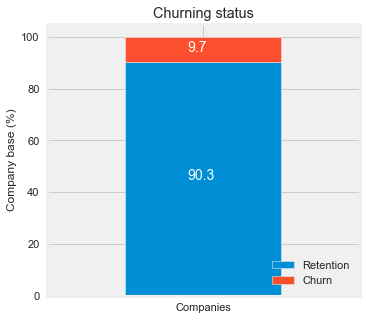

In [42]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )


churn = merged_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

The second function `annotate_bars` is used by the first function, but the third function `plot_distribution` helps you to plot the distribution of a numeric column. An example of how it can be used is given below:

### Let's explore that data further.

We will cover the following visualizations:

- **Correlation Matrix:** Visualizing the correlation between numerical variables to understand relationships.
- **Box Plots:** Analyzing numerical variables to identify potential outliers and distribution.
- **Histograms:**   Analyzing numreical variables to understand their distribution.
- **Count Plots:** Displaying the count of categorical variables to understand the distribution of categorical data.
- **Time Series Plot:** Visualizing time-based trends in customer churn.

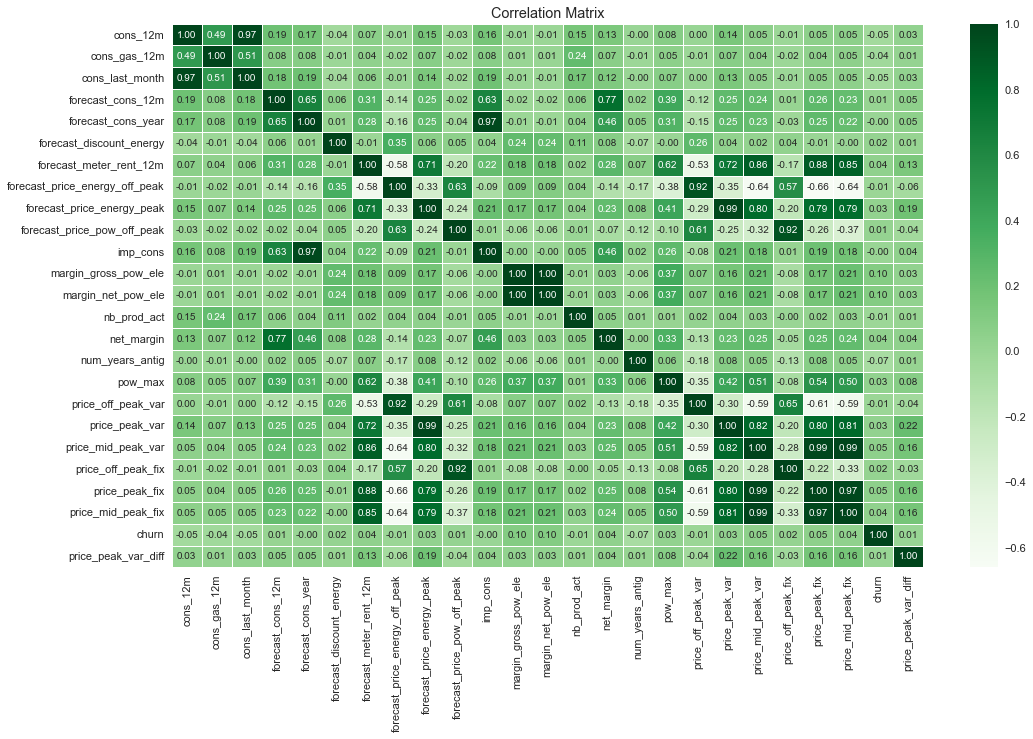

In [142]:
# Let's start with the Correlation Matrix

#Interpretation: The correlation matrix heatmap visualizes the relationships between numerical variables in the dataset. 
#Positive values indicate a positive correlation, and negative values indicate a negative correlation. 
#Closer to 1 represents a strong positive correlation, while closer to -1 indicates a strong negative correlation. Values close to 0 show little to no correlation.

import seaborn as sns

# Selecting numerical columns for correlation
numerical_columns = merged_df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
correlation_matrix = merged_df[numerical_columns].corr()

# Plot the correlation matrix as a heatmap using BCG green color
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [150]:
# Calculate correlations with churn and print them

# Convert the Index object to a list
numerical_columns = numerical_columns.tolist()

# Remove 'churn' if it's in the list
if 'churn' in numerical_columns:
    numerical_columns.remove('churn')

# List to hold the correlations
correlations = []

# Calculate correlations with churn for the numerical columns
for column in numerical_columns:
    correlation = merged_df[[column, 'churn']].corr().loc[column, 'churn']
    correlations.append((column, correlation))

# Converting the list of tuples to a Pandas DataFrame
correlation_df = pd.DataFrame(correlations, columns=['Metric', 'Correlation with Churn'])

# Displaying the DataFrame
correlation_df.sort_values(by='Correlation with Churn')

,Metric,Correlation with Churn
15,num_years_antig,-0.074033
0,cons_12m,-0.045918
2,cons_last_month,-0.045237
1,cons_gas_12m,-0.037897
13,nb_prod_act,-0.014780
7,forecast_price_energy_off_peak,-0.010703
17,price_off_peak_var,-0.006075
4,forecast_cons_year,-0.002540
10,imp_cons,-0.001552
23,price_peak_var_diff,0.005772


#### Let's interpret the results on PowerCo's concerns about customer churn in the SME segment and the potential relationship to various numerical variables

1. **Consumption Metrics**:
   - `cons_12m`, `cons_gas_12m`, `cons_last_month`: These negative correlations (-0.0459, -0.0379, -0.0452) suggest that higher consumption values in these metrics are associated with slightly lower churn rates. It's a weak relationship, meaning that consumption alone might not be a strong predictor of churn.

2. **Forecast Metrics**:
   - The correlations with forecast metrics are quite weak and close to 0, like `forecast_cons_12m`, `forecast_discount_energy`, etc. These metrics do not seem to have a strong linear relationship with churn, meaning they might not be very informative in predicting customer churn.

3. **Margin Metrics**:
   - `margin_gross_pow_ele`, `margin_net_pow_ele`: These have positive correlations (0.0958, 0.0958), indicating that higher margins are associated with slightly higher churn rates. Though the relationship is not very strong, these might be considered for further investigation.

4. **Customer Relationship Metrics**:
   - `num_years_antig`: This shows a negative correlation (-0.0740), implying that longer customer relationships are associated with slightly lower churn rates. It could be a sign of customer loyalty.

5. **Price Metrics**:
   - The correlations with price-related metrics like `price_off_peak_var`, `price_peak_var`, etc., are relatively low. However, some positive correlations indicate that higher prices in certain categories may be slightly associated with higher churn rates.

6. **Other Metrics**:
   - Metrics like `net_margin`, `pow_max`, etc., have correlations that are weak and close to 0, indicating that they might not be significantly related to churn.


**Summary**

PowerCo is concerned about losing customers in the SME segment, and there is a suspicion that changes in electricity prices may be the reason. We looked at various variables to see if there's a connection with customers leaving the company.

The correlations results suggest that there may be some weak relationships between certain variables and churn, but there doesn't appear to be a single strong predictor within these metrics. The combination of these features, rather than looking at each in isolation, might provide better insights. Additionally, since these are linear correlations, non-linear relationships might not be captured here, so other methods of analysis might also be useful.

The results show that while there is a slight tendency for customers to leave when certain prices (like peak and mid peak prices) go up, the relationship is weak. These factors alone may not be strong enough to explain why customers are leaving.

Given this information, the idea of implementing a 20% discount to retain at-risk customers may not directly address the underlying issues causing churn. Other factors beyond pricing should be investigated, such as customer service, product quality, or competitive pressures, to develop a more effective strategy to retain SME customers. We shall continue with our investigation further.


### Let's Further Visualize the numerical variables in relationship to Churn

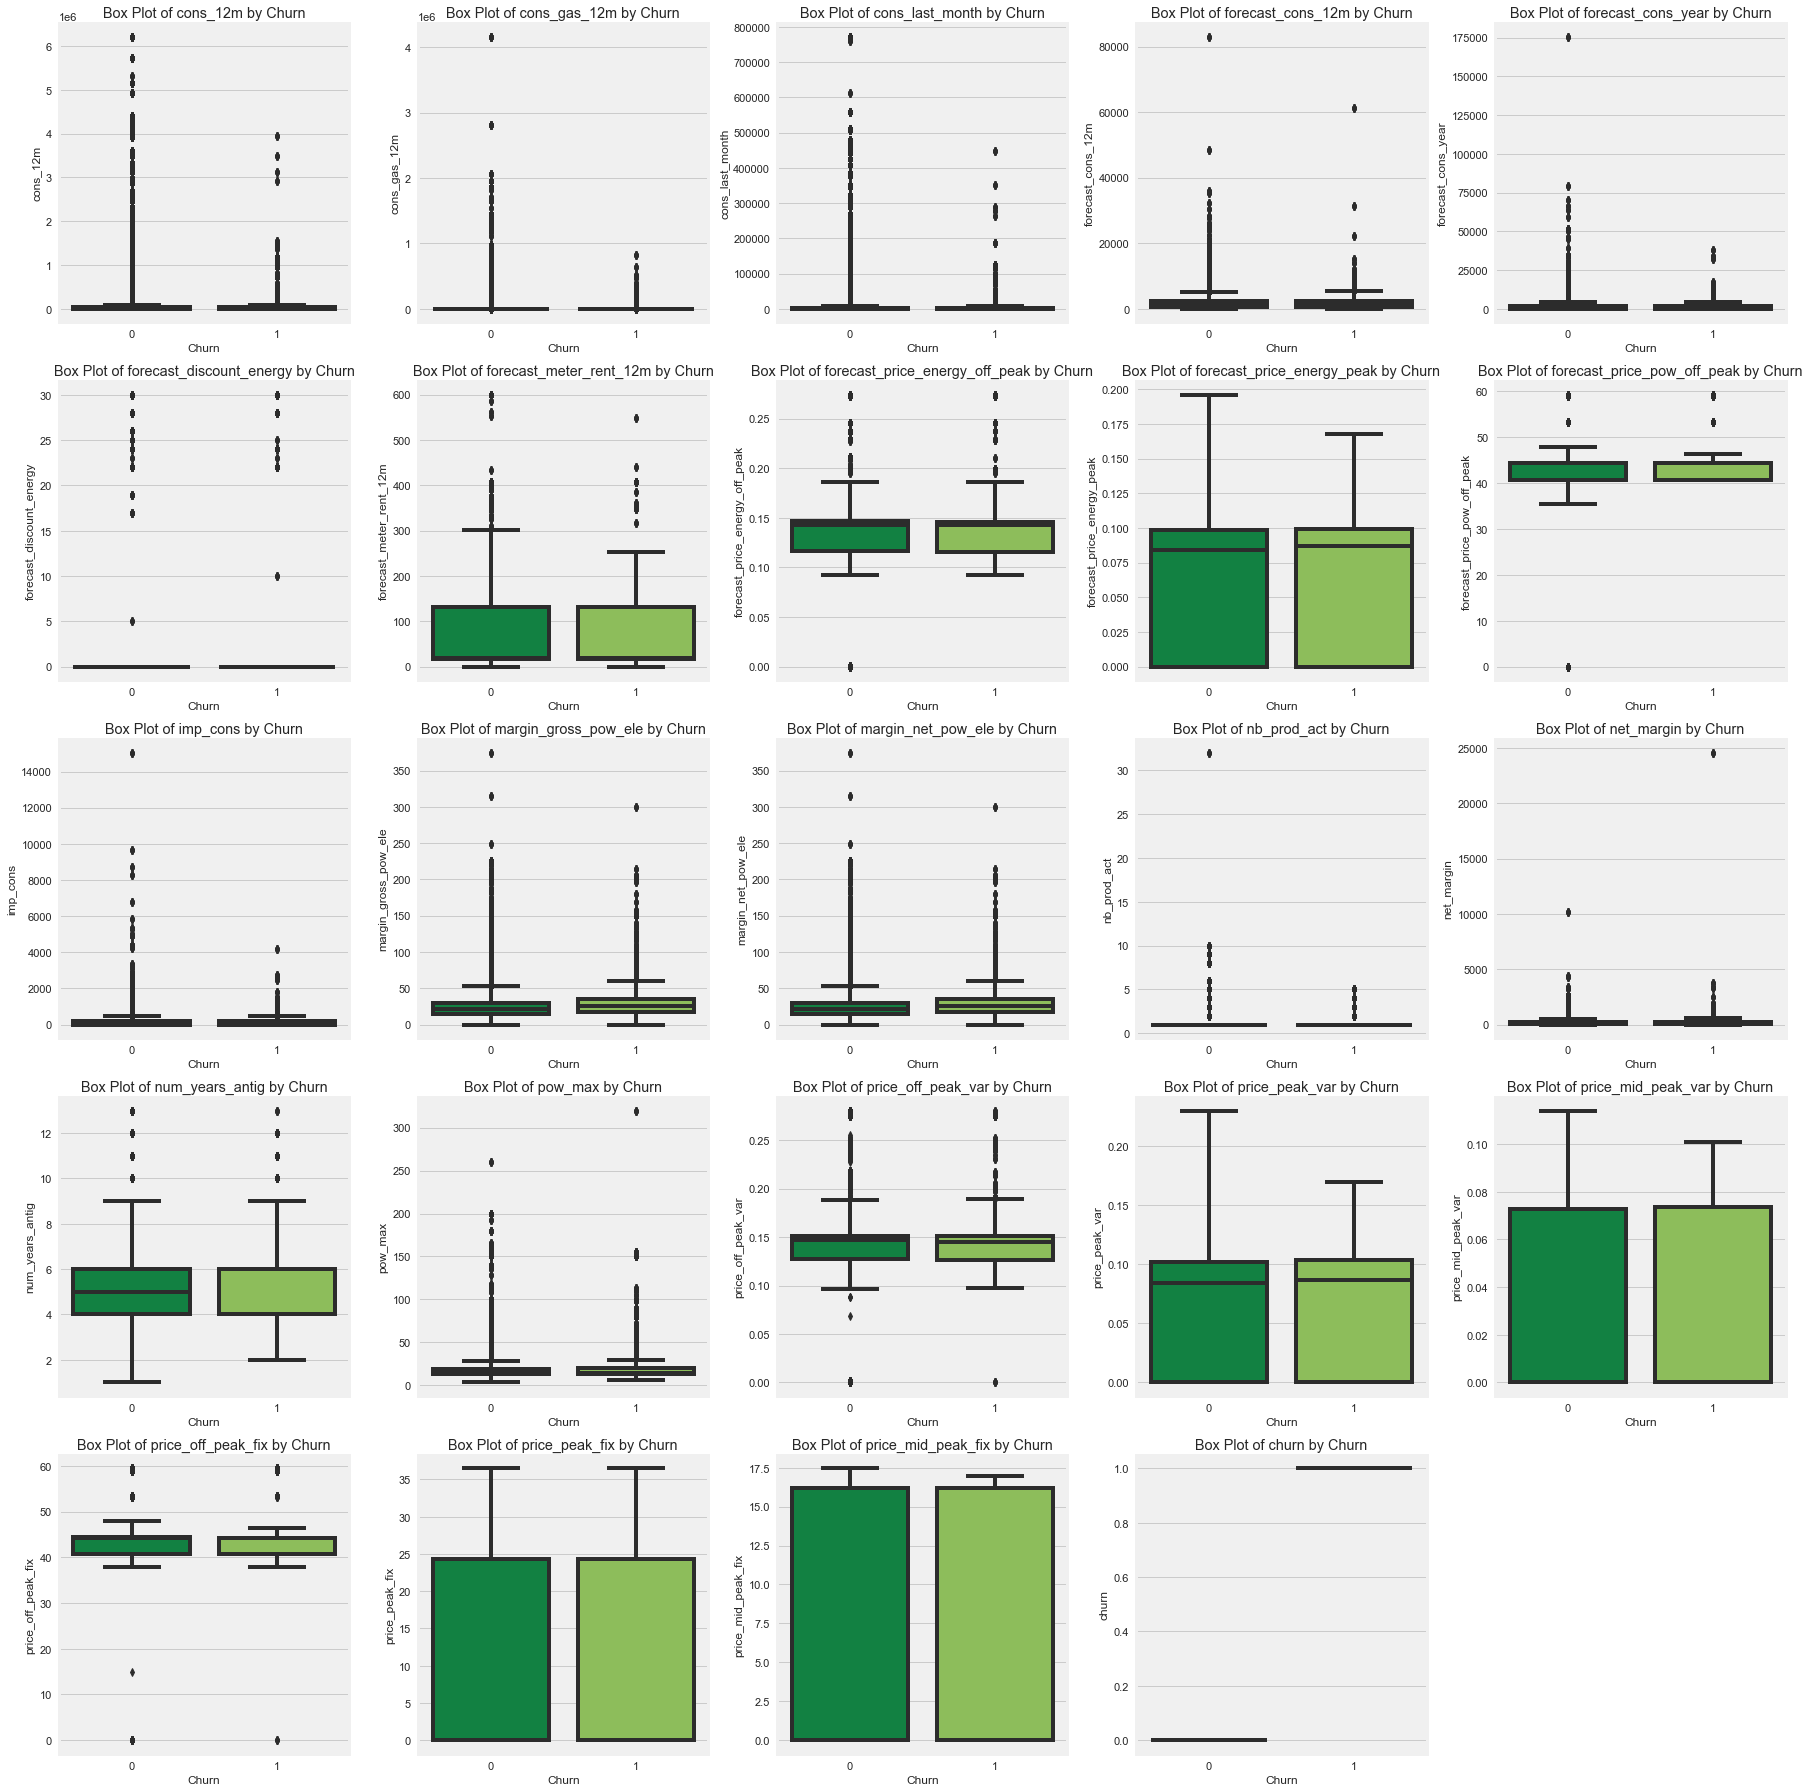

In [112]:
#Now, let's explore box plots to analyze numerical variables and detect potential outliers:

#Interpretation: The box plots show the distribution of numerical variables for both churned and retained companies. 
#It helps us identify outliers and compare the distribution of these variables between the two groups.

import seaborn as sns
import matplotlib.pyplot as plt

# Define BCG theme colors
bcg_green_light = "#8DCD4B"
bcg_green_dark = "#009340"

# Custom palette for the BCG theme
custom_palette = {0: bcg_green_dark, 1: bcg_green_light}

# Determine the number of columns you want to plot per row
columns_per_row = -(-len(numerical_columns) // 5)  # Ceiling division to calculate columns

# Plot box plots for each numerical column
plt.figure(figsize=(25, 25)) # Adjust the figure size as needed
for i, column in enumerate(numerical_columns):
    plt.subplot(5, columns_per_row, i+1) # 5 rows and 'columns_per_row' columns
    sns.boxplot(x='churn', y=column, data=merged_df, palette=custom_palette)
    plt.title(f'Box Plot of {column} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(column)
plt.tight_layout()
plt.show()


In [153]:
# Define a list to hold the calculated values
box_plot_values = []

# Iterate through the numerical columns
for column in numerical_columns:
    # Separate the values based on the churn value
    group_0 = merged_df[merged_df['churn'] == 0][column]
    group_1 = merged_df[merged_df['churn'] == 1][column]
    
    # Calculate the statistics for each group
    for group, churn_value in [(group_0, 0), (group_1, 1)]:
        min_val = group.min()
        lower_quartile = group.quantile(0.25)
        median = group.median()
        upper_quartile = group.quantile(0.75)
        max_val = group.max()
        iqr = upper_quartile - lower_quartile
        
        # Append the results to the list
        box_plot_values.append([column, churn_value, min_val, lower_quartile, median, upper_quartile, iqr, max_val])

# Create a DataFrame from the results
box_plot_df = pd.DataFrame(box_plot_values, columns=['Column', 'Churn', 'Min', 'Lower Quartile', 'Median', 'Upper Quartile', 'IQR', 'Max'])

# Round the numerical columns to 3 decimal places
numerical_stats_columns = ['Min', 'Lower Quartile', 'Median', 'Upper Quartile', 'IQR', 'Max']
box_plot_df[numerical_stats_columns] = box_plot_df[numerical_stats_columns].round(3)

# Display the DataFrame
box_plot_df



,Column,Churn,Min,Lower Quartile,Median,Upper Quartile,IQR,Max
0,cons_12m,0,0.000,5649.000,14075.000,40763.000,35114.000,6207104.000
1,cons_12m,1,0.000,5836.000,14529.000,40868.000,35032.000,3955941.000
2,cons_gas_12m,0,0.000,0.000,0.000,0.000,0.000,4154590.000
3,cons_gas_12m,1,0.000,0.000,0.000,0.000,0.000,828344.000
4,cons_last_month,0,0.000,0.000,800.000,3419.000,3419.000,771203.000
5,cons_last_month,1,0.000,0.000,740.000,3095.000,3095.000,448776.000
6,forecast_cons_12m,0,0.000,494.470,1108.550,2388.000,1893.530,82902.830
7,forecast_cons_12m,1,0.000,503.050,1152.350,2522.270,2019.220,61357.170
8,forecast_cons_year,0,0.000,0.000,312.000,1749.000,1749.000,175375.000
9,forecast_cons_year,1,0.000,0.000,326.000,1688.500,1688.500,37891.000


### Box Plot Churn Analysis for PowerCo

#### 1. **Electricity and Gas Consumption (`cons_12m`, `cons_gas_12m`, `cons_last_month`):**
   - **Electricity Consumption**: Retained and churned customers have similar electricity consumption patterns over the past year and the last month. There's a broad range, but the central values are comparable. It doesn't seem like consumption alone is driving churn.

   - **Gas Consumption**: Most customers do not consume gas, but some retained customers have very high gas consumption. This variable might need further investigation.

#### 2. **Forecasted Consumption and Price (`forecast_cons_12m`, `forecast_cons_year`, `forecast_price_energy_off_peak`, `forecast_price_energy_peak`):**
   - **Forecasted Consumption**: Churned customers have slightly higher forecasted electricity consumption for the next 12 months and the next calendar year. This could be related to price sensitivity if higher consumption leads to higher bills.
   
   - **Forecasted Price**: Similar patterns in price forecasts for off-peak and peak periods suggest that expected future prices may not be the main reason for churn.

#### 3. **Current Paid Consumption (`imp_cons`):**
   - **Churned Customers**: They have slightly higher current paid consumption. If this is linked to price, it could be part of the reason why they are leaving.

#### 4. **Margins (`margin_gross_pow_ele`, `margin_net_pow_ele`):**
   - **Higher Margins**: Churned customers have higher gross and net margins on their power subscription. This could indicate that they are paying more, supporting the hypothesis that price sensitivity drives churn.

#### 5. **Number of Active Products and Services (`nb_prod_act`):**
   - **Churned Customers**: They tend to have fewer active products and services. This could be a sign of dissatisfaction or seeking simplicity in billing.

#### 6. **Client Antiquity (`num_years_antig`):**
   - **Churned Customers**: Generally have spent fewer years with the service. Loyal or satisfied customers seem to stay longer.

#### 7. **Pricing (`price_off_peak_var`, `price_peak_var`, `price_mid_peak_var`):**
   - **Similar Pricing**: Both groups have similar pricing patterns, suggesting that current pricing may not be the sole factor in churn. However, this doesn't rule out the impact of recent price changes, which may not be captured in this data.

### Conclusion

While there are similarities in consumption and pricing between churned and retained customers, the data suggests that churned customers may be experiencing higher costs, as seen in their margins and current paid consumption. This supports the hypothesis that price sensitivities may be driving churn.

Given this insight, PowerCo's consideration of implementing a 20% discount for customers at risk of churning aligns well with the observed patterns. However, it would be valuable to conduct further analyses, possibly including customer interviews or surveys, to validate these findings and understand the specific price-related factors influencing churn. Understanding the context of higher consumption and its impact on price could also offer additional insights.

### Create New Combined Features

Based on the hypothesis and existing features, we can combine some to understand better how they relate to churn. Here are a few examples:

1. **Ratio of Current Consumption to Forecasted Consumption**: This can indicate whether the forecasts are aligned with actual consumption.

2. **Difference between Gross and Net Margin**: This might show the impact of discounts or other factors on pricing.

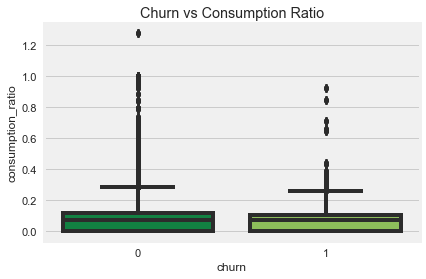

In [156]:
# Ratio of current consumption to forecasted consumption for the next 12 months
merged_df['consumption_ratio'] = merged_df['imp_cons'] / merged_df['forecast_cons_12m']

# visualise the current consumption to forcasted consumption with respect to churn
sns.boxplot(x='churn', y='consumption_ratio', data=merged_df, palette=custom_palette)
plt.title('Churn vs Consumption Ratio')
plt.show()


In [159]:
#Extract the statistics for the consumption ratio

# Define a list to hold the calculated values for consumption ratio
consumption_ratio_values = []

# Separate the values based on the churn value
group_0 = merged_df[merged_df['churn'] == 0]['consumption_ratio']
group_1 = merged_df[merged_df['churn'] == 1]['consumption_ratio']

# Calculate the statistics for each group
for group, churn_value in [(group_0, 0), (group_1, 1)]:
    min_val = group.min()
    lower_quartile = group.quantile(0.25)
    median = group.median()
    upper_quartile = group.quantile(0.75)
    max_val = group.max()
    iqr = upper_quartile - lower_quartile

    # Append the results to the list
    consumption_ratio_values.append(['consumption_ratio', churn_value, min_val, lower_quartile, median, upper_quartile, iqr, max_val])

# Create a DataFrame from the results
consumption_ratio_df = pd.DataFrame(consumption_ratio_values, columns=['Column', 'Churn', 'Min', 'Lower Quartile', 'Median', 'Upper Quartile', 'IQR', 'Max'])

# Round the numerical columns to 3 decimal places
numerical_stats_columns = ['Min', 'Lower Quartile', 'Median', 'Upper Quartile', 'IQR', 'Max']
consumption_ratio_df[numerical_stats_columns] = consumption_ratio_df[numerical_stats_columns].round(3)

# Display the DataFrame
consumption_ratio_df


,Column,Churn,Min,Lower Quartile,Median,Upper Quartile,IQR,Max
0,consumption_ratio,0,0.0,0.0,0.069,0.114,0.114,1.276
1,consumption_ratio,1,0.0,0.0,0.067,0.103,0.103,0.923


### Insights:
1. **Similar Medians**: Both groups have nearly similar median consumption ratios, indicating that, on a median level, current consumption compared to forecasted consumption does not significantly differ between those who churned and those who did not.

2. **Lower Upper Quartile for Churned Clients**: The upper quartile for churned clients is slightly lower, which may suggest that a portion of churned clients were consuming less than forecasted.

3. **Wider Range for Non-Churned Clients**: The maximum consumption ratio for non-churned clients is higher, and the IQR is slightly wider, showing more variability in the consumption patterns of non-churned clients.

### Conclusion:
The data does not present a stark contrast between the two groups regarding their consumption ratio. The slight differences in the upper quartile and IQR might need further investigation but do not conclusively support the hypothesis that price sensitivities are the primary driver of churn.

Considering the business context and the hypothesis that price changes may be affecting churn, it may be beneficial to examine other variables or combinations of variables, such as recent price changes, consumption patterns, or individualized price offerings, to uncover more insights into the churn behavior among SME customers.

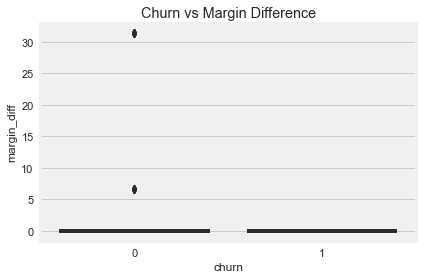

In [158]:
# Difference between gross and net margin
merged_df['margin_diff'] = merged_df['margin_gross_pow_ele'] - merged_df['margin_net_pow_ele']

# visualize the Difference between Gross and Net Margin
sns.boxplot(x='churn', y='margin_diff', data=merged_df, palette=custom_palette)
plt.title('Churn vs Margin Difference')
plt.show()


In [164]:
#Extract the statistics for the gross and net margin difference

# Define a list to hold the calculated values for margin difference
margin_diff_values = []

# Separate the values based on the churn value
group_0 = merged_df[merged_df['churn'] == 0]['margin_diff']
group_1 = merged_df[merged_df['churn'] == 1]['margin_diff']

# Calculate the statistics for each group
for group, churn_value in [(group_0, 0), (group_1, 1)]:
    min_val = group.min()
    lower_quartile = group.quantile(0.25)
    median = group.median()
    upper_quartile = group.quantile(0.75)
    max_val = group.max()
    iqr = upper_quartile - lower_quartile

    # Append the results to the list
    margin_diff_values.append(['gross_net_margin_diff', churn_value, min_val, lower_quartile, median, upper_quartile, iqr, max_val])

# Create a DataFrame from the results
gross_net_margin_df = pd.DataFrame(margin_diff_values, columns=['Column', 'Churn', 'Min', 'Lower Quartile', 'Median', 'Upper Quartile', 'IQR', 'Max'])

# Round the numerical columns to 3 decimal places
numerical_stats_columns = ['Min', 'Lower Quartile', 'Median', 'Upper Quartile', 'IQR', 'Max']
gross_net_margin_df[numerical_stats_columns] = gross_net_margin_df[numerical_stats_columns].round(4)

# Display the DataFrame
gross_net_margin_df

,Column,Churn,Min,Lower Quartile,Median,Upper Quartile,IQR,Max
0,gross_net_margin_diff,0,0.0,0.0,0.0,0.0,0.0,31.34
1,gross_net_margin_diff,1,0.0,0.0,0.0,0.0,0.0,0.00


1. **For Customers Who Have Not Churned (Churn = 0):**
   - **Minimum, Lower Quartile, Median, Upper Quartile:** These values all being zero indicate that there is typically no difference between the gross margin and net margin for this group. This uniformity might suggest a standard pricing strategy or consistent costs that affect both gross and net margins equally.
   - **Maximum Value:** The maximum value of 31.34 indicates that there are some exceptions where the difference between the gross and net margin is significant. This could be due to special pricing, discounts, or unique cost structures for certain customers.
   - **Interquartile Range (IQR):** The IQR being zero confirms that most of the values lie at zero, with little variation within the middle 50% of the data.

2. **For Customers Who Have Churned (Churn = 1):**
   - **Minimum, Lower Quartile, Median, Upper Quartile, and Maximum:** All these values are zero for the churned customers. This suggests that there is absolutely no difference between the gross and net margin for the customers who have churned.
   - **Interquartile Range (IQR):** Similar to the non-churned group, the IQR is zero, indicating no variation in the middle 50% of the data.

### Interpretation In Context of Background and Hypothesis:
Given the hypothesis that price sensitivities primarily drive churn among SME customers, these results may seem somewhat counterintuitive. The lack of difference between gross and net margins in both churned and non-churned customers implies that price changes (in terms of margins) are not distinguishing factors in customer churn.

In light of the background information that PowerCo is experiencing significant churn and considering implementing discounts, the following points could be relevant:
- Since there is no apparent difference in margins between churned and non-churned customers, the hypothesis that price sensitivity drives churn might need to be reconsidered or refined.
- Other factors not captured in this analysis might be influencing churn, such as customer service, contract terms, or overall pricing strategy.
- The maximum value for non-churned customers might be worth investigating further to understand any unique characteristics or circumstances that lead to a substantial difference in gross and net margins.

In conclusion, the given data does not provide clear evidence to support the initial hypothesis regarding price sensitivity. Further exploration of other variables and potentially more detailed segmentation of customers might be necessary to uncover the underlying causes of churn.

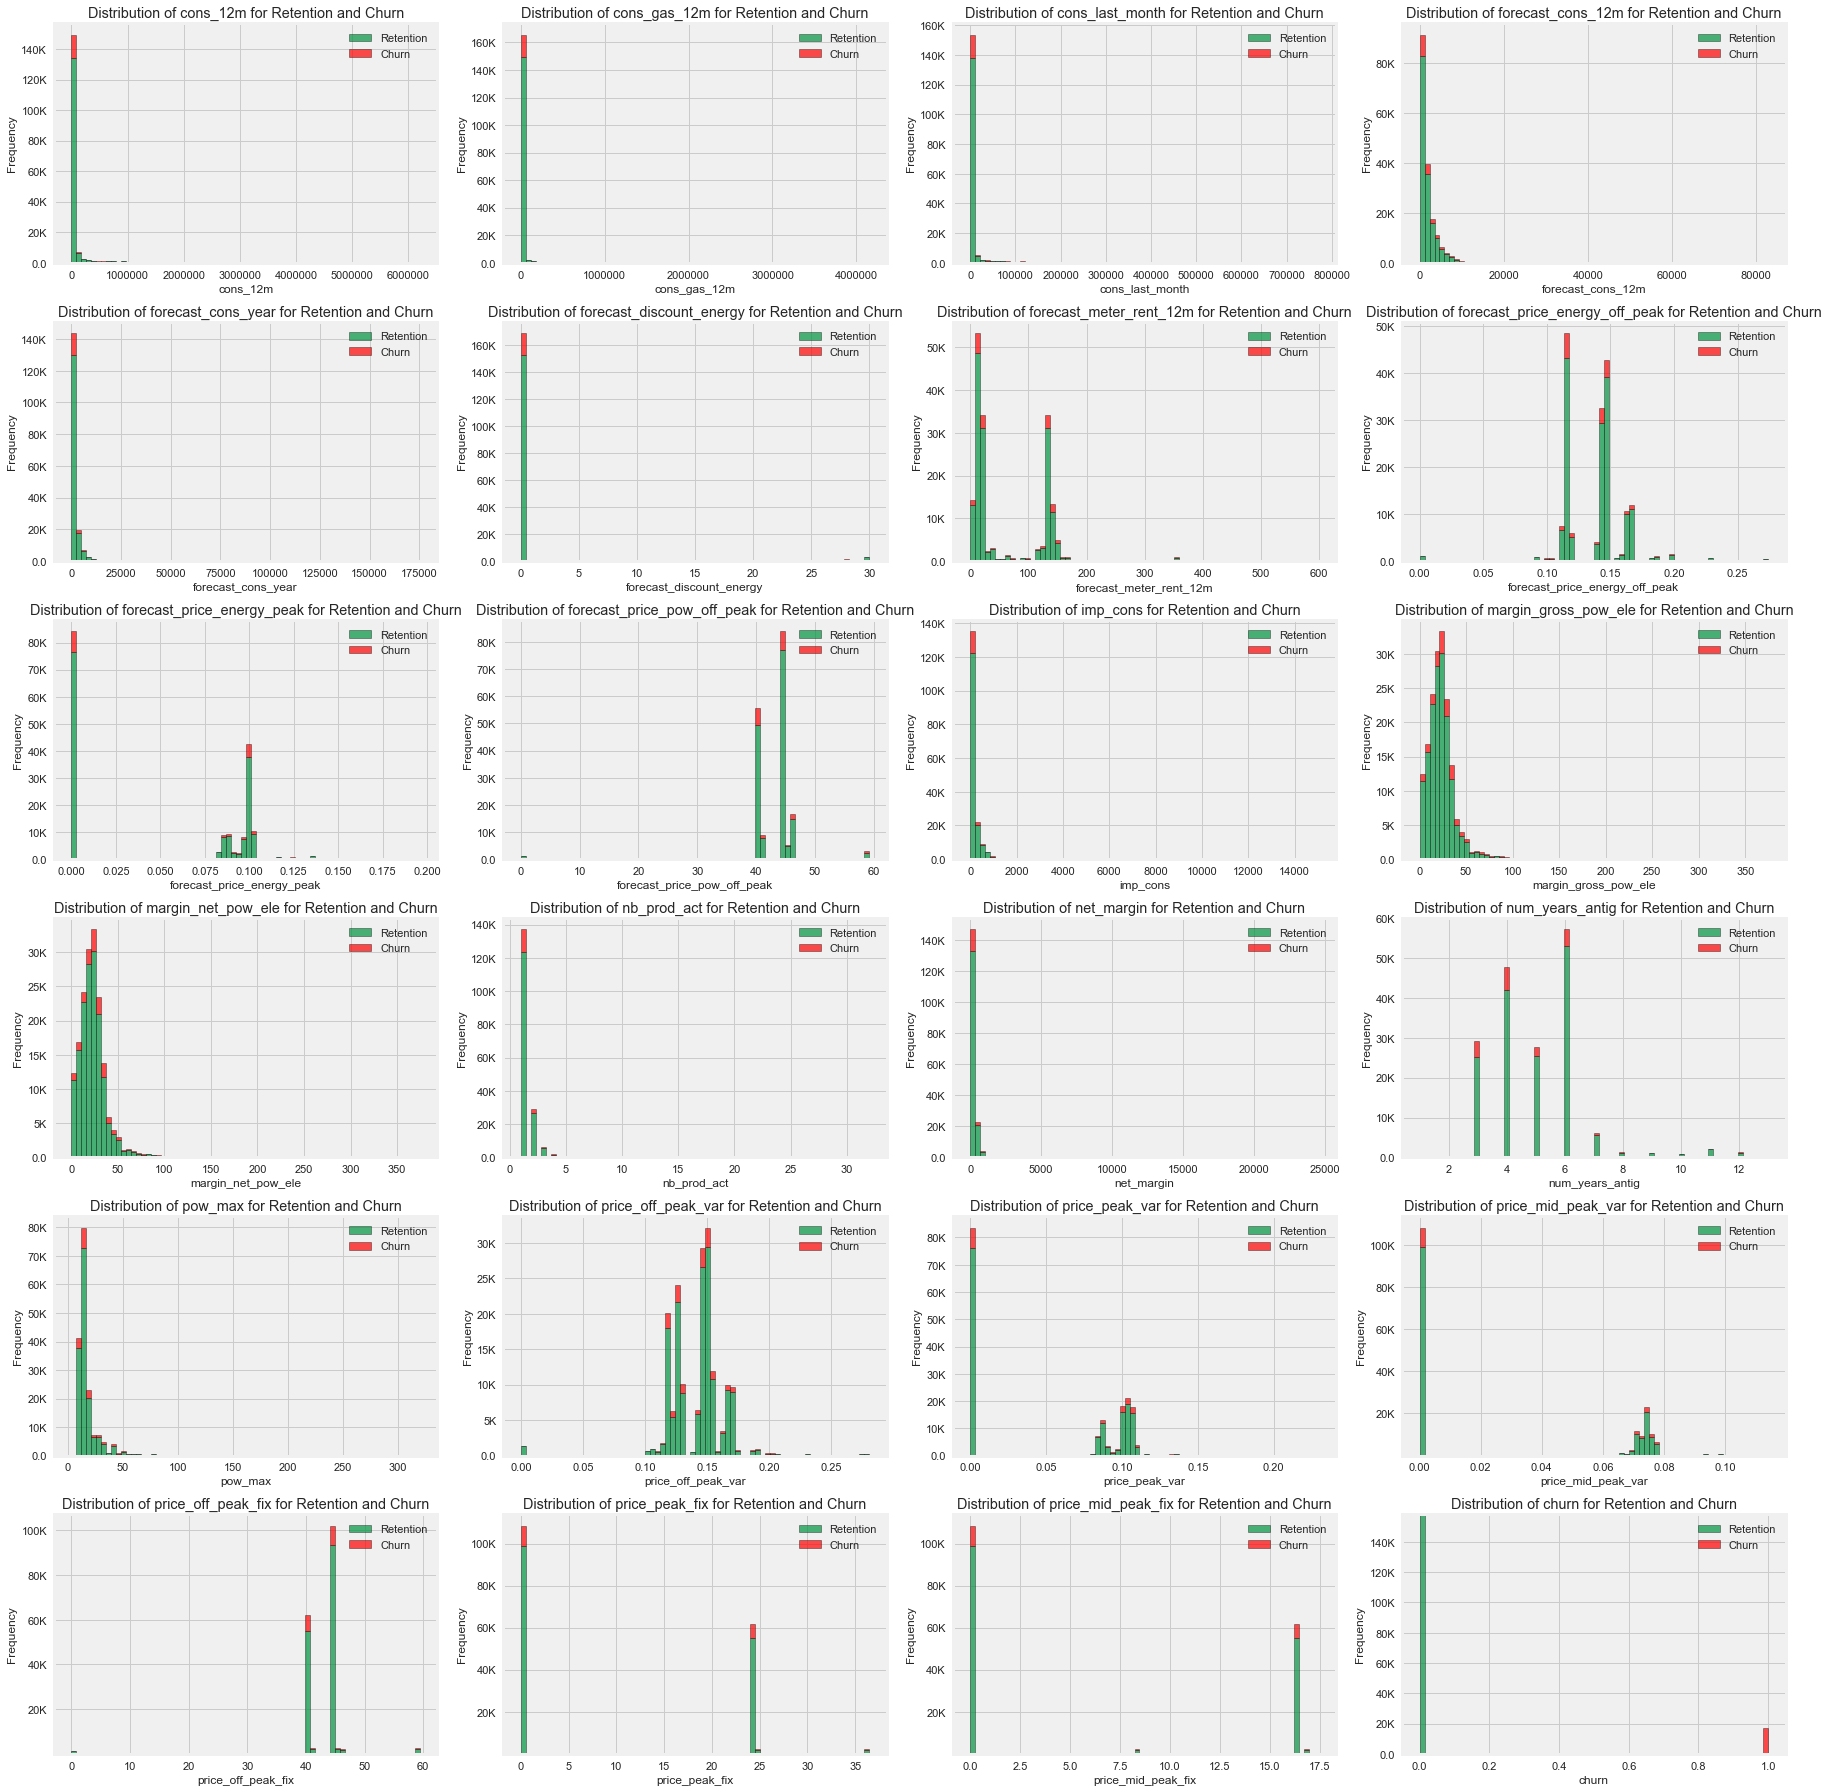

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distribution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plotted
    temp = pd.DataFrame({
        "Retention": dataframe[dataframe["churn"] == 0][column],
        "Churn": dataframe[dataframe["churn"] == 1][column]
    })
    
    # Plot the histogram with increased bin width
    temp[["Retention", "Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True, alpha=0.7, color=['#009340', '#FF0000'], edgecolor='black')
    
    # X-axis label
    ax.set_xlabel(column)
    
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')
    
    # Format y-axis ticks to display thousands as "K"
    def format_thousands(value, tick_number):
        if value >= 1000:
            value = f"{value / 1000:.0f}K"
        return value
    ax.yaxis.set_major_formatter(FuncFormatter(format_thousands))
    
    # Legend
    ax.legend(["Retention", "Churn"])
    
    # Set the title
    ax.set_title(f'Distribution of {column} for Retention and Churn')
    
    # Y-axis label
    ax.set_ylabel('Frequency')

# Determine the number of rows you want to plot
rows = -(-len(numerical_columns) // 4)  # Ceiling division to calculate rows

fig, axs = plt.subplots(nrows=rows, ncols=4, figsize=(25, 25))

for i, column in enumerate(numerical_columns):
    plot_distribution(merged_df, column, axs[i // 4, i % 4], bins_=70)

plt.tight_layout()
plt.show()


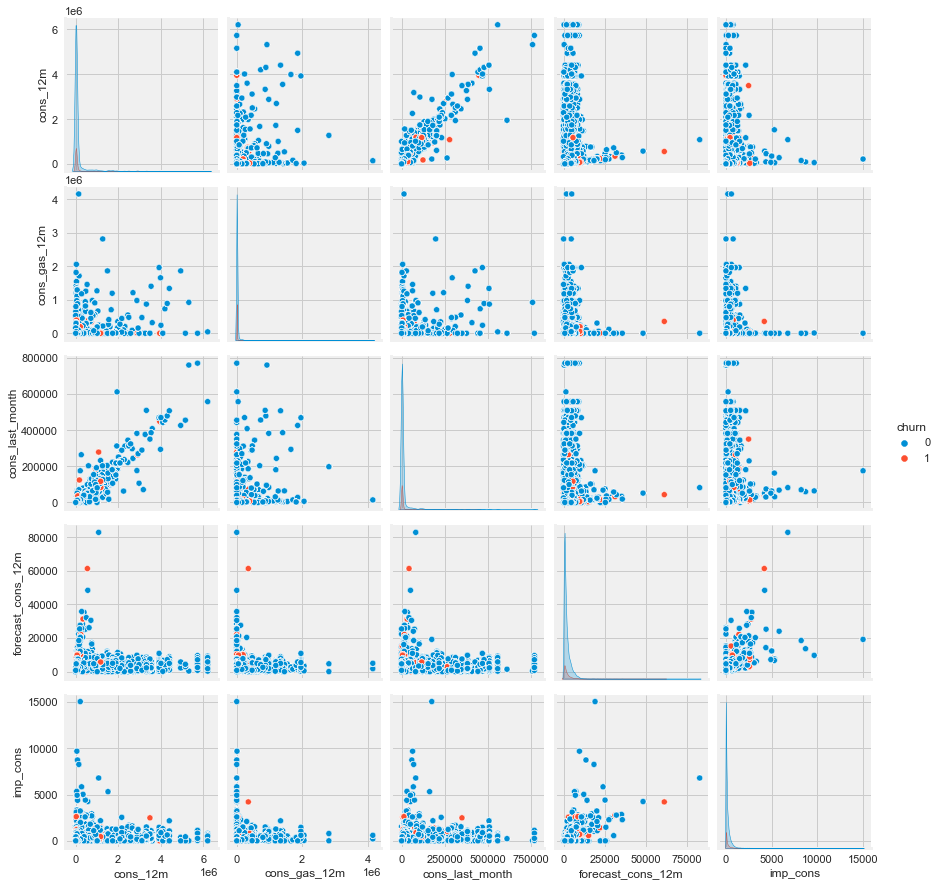

In [165]:
# Analyzing consumption patterns
consumption_columns = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m', 'imp_cons']
consumption_df = merged_df[consumption_columns + ['churn']]
sns.pairplot(consumption_df, hue='churn')
plt.show()


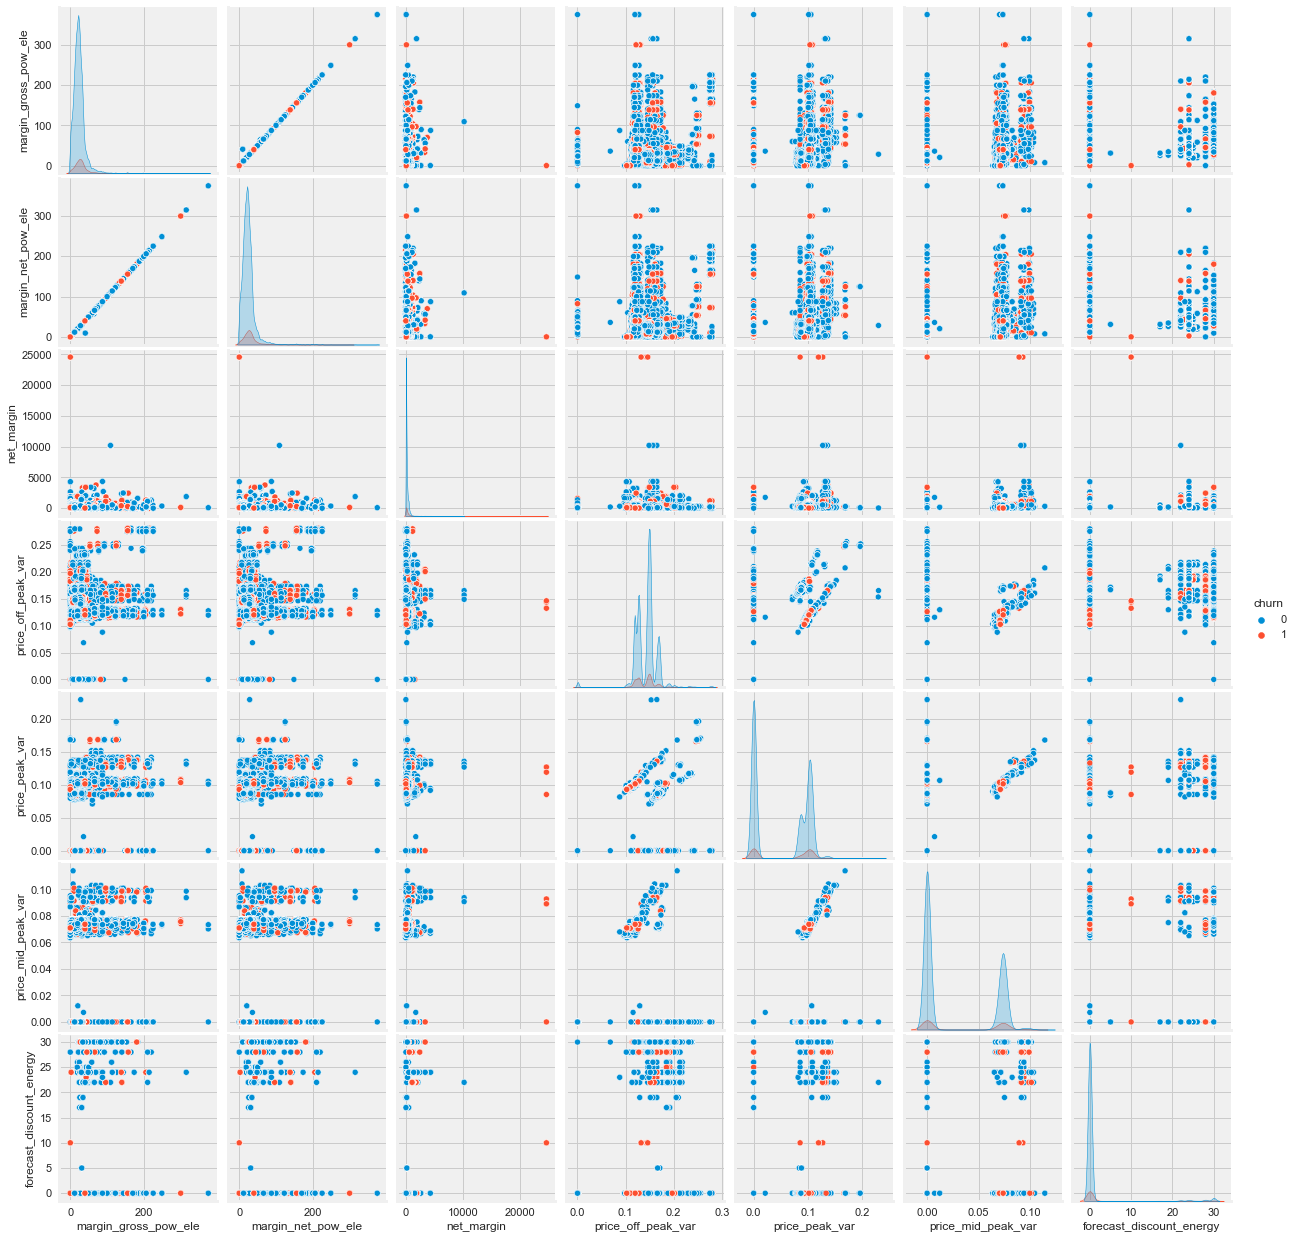

In [166]:
# Analyzing pricing and margins
pricing_columns = ['margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'price_off_peak_var', 'price_peak_var', 'price_mid_peak_var', 'forecast_discount_energy']
pricing_df = merged_df[pricing_columns + ['churn']]
sns.pairplot(pricing_df, hue='churn')
plt.show()


In [169]:
#Calculate the contract length, days to renewal, and days since the last modification of the product. All the features are then combined into the contract_df DataFrame.
from datetime import datetime
# Calculating contract_length in days
merged_df['contract_length'] = (merged_df['date_end'] - merged_df['date_activ']).dt.days

# Calculating days_to_renewal in days
merged_df['days_to_renewal'] = (merged_df['date_renewal'] - datetime.now()).dt.days

# Calculating the duration since the last modification of the product in days
merged_df['days_since_last_modif'] = (datetime.now() - merged_df['date_modif_prod']).dt.days

# Creating a DataFrame with the new features
contract_columns = ['date_activ', 'date_end', 'date_renewal', 'nb_prod_act', 'num_years_antig', 'contract_length', 'days_to_renewal', 'days_since_last_modif']
contract_df = merged_df[contract_columns + ['churn']]

contract_df.head()

,date_activ,date_end,date_renewal,nb_prod_act,num_years_antig,contract_length,days_to_renewal,days_since_last_modif,churn
0,2013-06-15,2016-06-15,2015-06-23,2,3,1096,-2970,2838,1
1,2013-06-15,2016-06-15,2015-06-23,2,3,1096,-2970,2838,1
2,2013-06-15,2016-06-15,2015-06-23,2,3,1096,-2970,2838,1
3,2013-06-15,2016-06-15,2015-06-23,2,3,1096,-2970,2838,1
4,2013-06-15,2016-06-15,2015-06-23,2,3,1096,-2970,2838,1


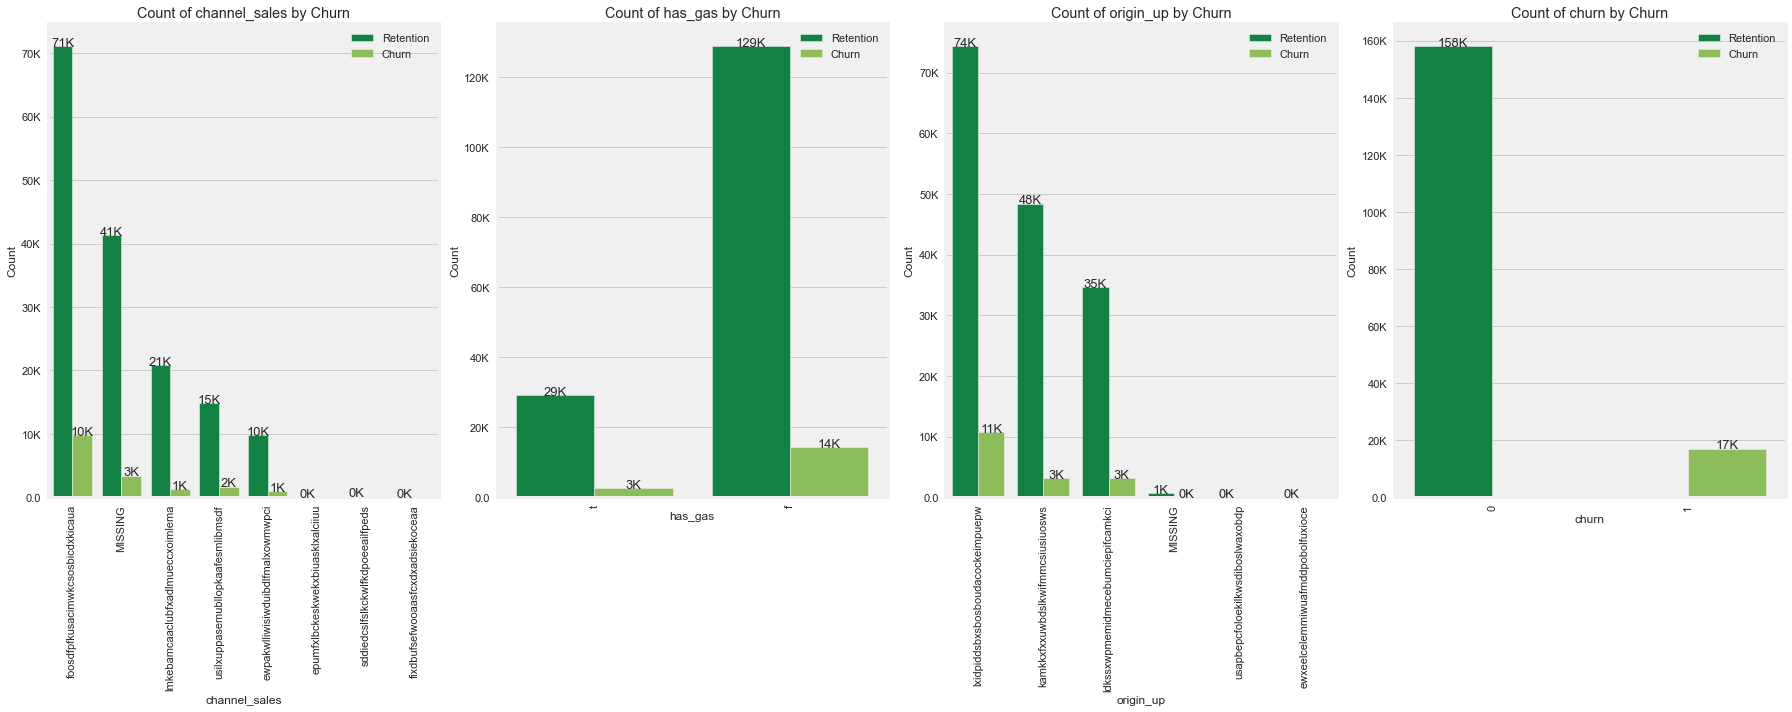

In [144]:
#Next, let's plot the count of categorical variables:


#Interpretation: The count plots visualize the distribution of categorical variables (e.g., channel_sales, has_gas, origin_up) for both churned and retained companies.
#The plots help identify patterns and relationships between these categorical features and customer churn.

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FuncFormatter

# Categorical columns to plot
categorical_columns = ['channel_sales', 'has_gas', 'origin_up','churn']

# Define BCG theme colors
bcg_green_light = "#8DCD4B"
bcg_green_dark = "#009340"

# Define a custom palette for the BCG theme
custom_palette = {0: bcg_green_dark, 1: bcg_green_light}

# Format y-axis ticks to display thousands as "K"
def format_thousands(value, tick_number):
    if value >= 1000:
        value = f"{value / 1000:.0f}K"
    return value

# Plot count plots for each categorical column
plt.figure(figsize=(25, 10))
for i, column in enumerate(categorical_columns):
    plt.subplot(1, len(categorical_columns), i+1)
    ax = sns.countplot(x=column, hue='churn', data=merged_df, palette=custom_palette)
    plt.title(f'Count of {column} by Churn')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='', labels=['Retention', 'Churn'], loc='upper right')
    plt.xticks(rotation=90)  # Tilt x-axis ticker values by 90 degrees
    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands)) # Apply formatting to y-axis

    # Annotate bars with actual value in K
    for p in ax.patches:
        ax.annotate(f'{p.get_height() / 1000:.0f}K', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=13)

plt.tight_layout()
plt.show()



In [ ]:
#Next, let's plot the percentage of categorical variables:

In [170]:
# Count of channel_sales by churn
channel_sales_counts = merged_df.groupby(['channel_sales', 'churn']).size().reset_index(name='count')
channel_sales_counts_df = pd.DataFrame(channel_sales_counts)

# Count of has_gas by churn
has_gas_counts = merged_df.groupby(['has_gas', 'churn']).size().reset_index(name='count')
has_gas_counts_df = pd.DataFrame(has_gas_counts)

# Count of origin_up by churn
origin_up_counts = merged_df.groupby(['origin_up', 'churn']).size().reset_index(name='count')
origin_up_counts_df = pd.DataFrame(origin_up_counts)

# Count of churn by churn
churn_counts = merged_df.groupby('churn').size().reset_index(name='count')
churn_counts_df = pd.DataFrame(churn_counts)


In [173]:
channel_sales_counts_df, has_gas_counts_df, origin_up_counts_df

(             channel_sales            churn  count
 0                            MISSING    0    41290
 1                            MISSING    1     3394
 2   epumfxlbckeskwekxbiuasklxalciiuu    0       36
 3   ewpakwlliwisiwduibdlfmalxowmwpci    0     9813
 4   ewpakwlliwisiwduibdlfmalxowmwpci    1      899
 5   fixdbufsefwooaasfcxdxadsiekoceaa    0       24
 6   foosdfpfkusacimwkcsosbicdxkicaua    0    71149
 7   foosdfpfkusacimwkcsosbicdxkicaua    1     9822
 8   lmkebamcaaclubfxadlmueccxoimlema    0    20871
 9   lmkebamcaaclubfxadlmueccxoimlema    1     1234
 10  sddiedcslfslkckwlfkdpoeeailfpeds    0      131
 11  usilxuppasemubllopkaafesmlibmsdf    0    14832
 12  usilxuppasemubllopkaafesmlibmsdf    1     1654,
   has_gas  churn   count
 0     f      0    128965
 1     f      1     14399
 2     t      0     29181
 3     t      1      2604,
               origin_up              churn  count
 0                           MISSING    0      719
 1                           MISSING  

#### Let's Further interpret the results on PowerCo's concerns about customer churn in the SME segment and the potential relationship to categorical variables.

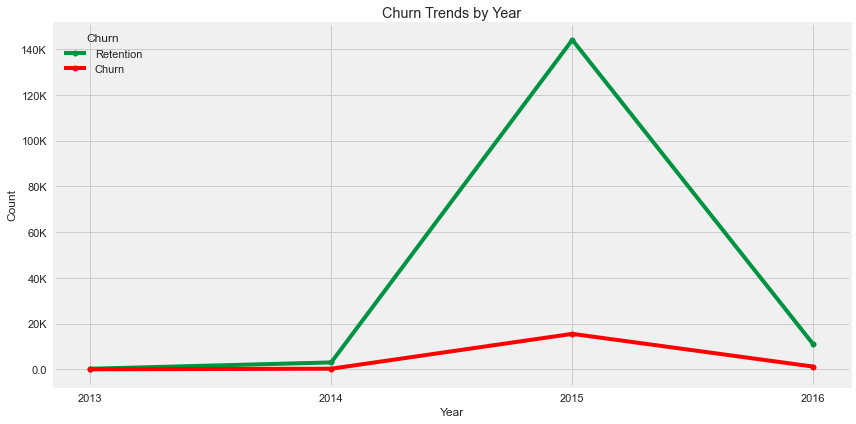

In [136]:
#Lastly, let's visualize time-based trends in customer churn using a time series plot:
#Interpretation: The time series plot shows the yearly trend of customer churn. It helps us understand if there are any significant changes in churn rates over time.

# Create a new DataFrame with 'date_renewal' and 'churn' columns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator

# Define BCG theme colors
bright_red = "#FF0000"
bcg_green_dark = "#009340"

# Define function to format y-axis labels as thousands "K"
def format_thousands(value, tick_number):
    if value >= 1000:
        value = f"{value / 1000:.0f}K"
    return value

# Extract the year from the date_renewal
churn_trends = merged_df[['date_renewal', 'churn']]
churn_trends['year'] = churn_trends['date_renewal'].dt.year
churn_trends_grouped = churn_trends.groupby(['year', 'churn']).size().unstack()

# Plot time series plot
ax = churn_trends_grouped.plot(kind='line', marker='o', figsize=(12, 6), color=[bcg_green_dark, bright_red])
plt.title('Churn Trends by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper left', labels=['Retention', 'Churn'])
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))

# Set x-axis to display whole numbers
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()
